In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('CLEAR_DATASET.csv')

In [3]:
del data['Unnamed: 0']
del data['display hz']
del data['display size']

rating = data['rating']
del data['rating']
smartphones = data['smartphone']
del data['smartphone']

data.head()

,price,inbuilt memory,battery,camera
0,61048.89,256.0,5000.0,50.0
1,22187.79,128.0,5000.0,64.0
2,18313.89,64.0,5000.0,50.0
3,16648.89,128.0,5000.0,50.0
4,27748.89,128.0,5000.0,108.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           953 non-null    float64
 1   inbuilt memory  953 non-null    float64
 2   battery         953 non-null    float64
 3   camera          953 non-null    float64
dtypes: float64(4)
memory usage: 29.9 KB


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
StdScaler = StandardScaler()
StdScaler.fit(data)

data = pd.DataFrame(data=StdScaler.transform(data), columns=data.columns)
data.head()

,price,inbuilt memory,battery,camera
0,0.856494,1.110644,0.352049,-0.015525
1,-0.354611,-0.107008,0.352049,0.413582
2,-0.475341,-0.715833,0.352049,-0.015525
3,-0.527230,-0.107008,0.352049,-0.015525
4,-0.181299,-0.107008,0.352049,1.762204


In [7]:
from sklearn.cluster import KMeans


In [8]:
MAIN_model = KMeans(random_state=42)
MAIN_model.fit(data)

C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(random_state=42)

In [9]:
test = [50000, 256, 5000, 64]
test = StdScaler.transform([test])
StdScaler.inverse_transform

C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.51215613, 1.11064374, 0.35204921, 0.4135823 ]])

In [10]:
data['MAIN_class'] = MAIN_model.predict(data)
data.head()

,price,inbuilt memory,battery,camera,MAIN_class
0,0.856494,1.110644,0.352049,-0.015525,2
1,-0.354611,-0.107008,0.352049,0.413582,4
2,-0.475341,-0.715833,0.352049,-0.015525,4
3,-0.527230,-0.107008,0.352049,-0.015525,4
4,-0.181299,-0.107008,0.352049,1.762204,6


In [11]:
PRICE_model = KMeans(random_state=42).fit(data['price'].to_numpy().reshape(-1, 1))
MEMORY_model = KMeans(random_state=42).fit(data['inbuilt memory'].to_numpy().reshape(-1, 1))
BATTERY_model = KMeans(random_state=42).fit(data['battery'].to_numpy().reshape(-1, 1))
CAMERA_model = KMeans(random_state=42).fit(data['camera'].to_numpy().reshape(-1, 1))

C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [12]:
data['price_class'] = PRICE_model.predict(data['price'].to_numpy().reshape(-1, 1))
data['memory_class'] = MEMORY_model.predict(data['inbuilt memory'].to_numpy().reshape(-1, 1))
data['battery_class'] = BATTERY_model.predict(data['battery'].to_numpy().reshape(-1, 1))
data['camera_class'] = CAMERA_model.predict(data['camera'].to_numpy().reshape(-1, 1))

In [13]:
data['smartphones'] = smartphones
data['rating'] = rating

In [14]:
data.head()

,price,inbuilt memory,battery,camera,MAIN_class,price_class,memory_class,battery_class,camera_class,smartphones,rating
0,0.856494,1.110644,0.352049,-0.015525,2,2,1,1,0,oneplus 11 5g,89.0
1,-0.354611,-0.107008,0.352049,0.413582,4,0,0,1,4,oneplus nord ce 2 lite 5g,81.0
2,-0.475341,-0.715833,0.352049,-0.015525,4,0,3,1,0,samsung galaxy a14 5g,75.0
3,-0.527230,-0.107008,0.352049,-0.015525,4,0,0,1,0,motorola moto g62 5g,81.0
4,-0.181299,-0.107008,0.352049,1.762204,6,5,0,1,1,realme 10 pro plus,82.0


In [15]:
data.to_csv('Data_with_CLASSES.csv')

In [16]:
MODELS = {
    'main': MAIN_model,
    'price': PRICE_model,
    'memory': MEMORY_model,
    'battery': BATTERY_model,
    'camera': CAMERA_model,
    'scaler': StdScaler
}

In [17]:
import pickle
with open("ML_MODELS.pickle", "wb") as file:
    pickle.dump(MODELS, file)

In [18]:
with open("ML_MODELS.pickle", "rb") as file:
    testing = pickle.load(file)

In [42]:
data.head()

,price,inbuilt memory,battery,camera,MAIN_class,price_class,memory_class,battery_class,camera_class,smartphones,rating
0,0.856494,1.110644,0.352049,-0.015525,2,2,1,1,0,oneplus 11 5g,89.0
1,-0.354611,-0.107008,0.352049,0.413582,4,0,0,1,4,oneplus nord ce 2 lite 5g,81.0
2,-0.475341,-0.715833,0.352049,-0.015525,4,0,3,1,0,samsung galaxy a14 5g,75.0
3,-0.527230,-0.107008,0.352049,-0.015525,4,0,0,1,0,motorola moto g62 5g,81.0
4,-0.181299,-0.107008,0.352049,1.762204,6,5,0,1,1,realme 10 pro plus,82.0


In [41]:
test = [45000.0, 50.0, 5000.0, 128.0]
StdScaler.transform([test])

# PRICE_model.predict([[0.35633128]])

C:\Users\bigbl\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.35633128, -0.84901399,  0.35204921,  2.3752141 ]])

In [31]:
to_add_price = StdScaler.inverse_transform(data.iloc[:, :4]).T
to_add_price = to_add_price[0]

price_df = pd.DataFrame(data[['price', 'price_class']])
price_df['price'] = to_add_price
price_df.head()

,price,price_class
0,61048.89,2
1,22187.79,0
2,18313.89,0
3,16648.89,0
4,27748.89,5


<Axes: xlabel='price_class', ylabel='price'>

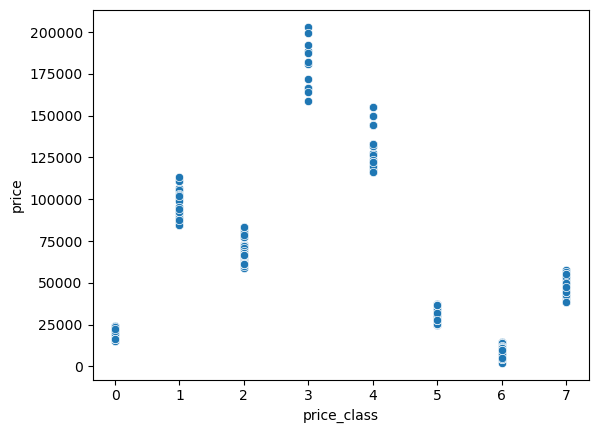

In [38]:
import seaborn as sns
sns.scatterplot(data=price_df, x='price_class', y = 'price')